# Linear Regression

The dataset associated to this assignment was downloaded from www.hemnet.se on 2020-10-18. The data contains information about selling prices of villas in Landvetter that were sold in the past 12 months. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_assignment2-1.csv')

In [3]:
#Check missing data of 2 columns Living area and Selling price
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             56 non-null     int64  
 1   Living_area    56 non-null     int64  
 2   Rooms          54 non-null     float64
 3   Land_size      55 non-null     float64
 4   Biarea         32 non-null     float64
 5   Age            56 non-null     int64  
 6   Selling_price  56 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 3.2 KB


In [4]:
#Check duplicate
for i in range(len(df)):
    if df.duplicated()[i] == True:
        print(df.duplicated()[i])       

As we can see, there are no duplicated values found.

## Linear regression model that relates the living area to the selling price. 

We decided to use simple linear regression model which using only one predictor living area to predict the selling price. We have checked whether the data set contain any missing values on the two columns we wanted to use and also check if there are any duplicated values. We found that there are no need to do any data cleaning.

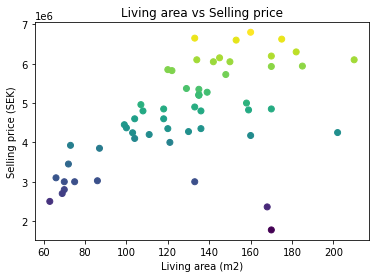

In [5]:
# Scatter plot 
plt.scatter(df['Living_area'], df['Selling_price'], c = df["Selling_price"])
plt.title('Living area vs Selling price')
plt.xlabel("Living area (m2)")
plt.ylabel("Selling price (SEK)")
plt.show()

In [6]:
x = np.array([[i] for i in df['Living_area']])
y = np.array(df["Selling_price"])

In [7]:
#Generating a linear regression model, which is a line in this case
model = LinearRegression()

In [8]:
#Fitting the model
model.fit(x,y)

LinearRegression()

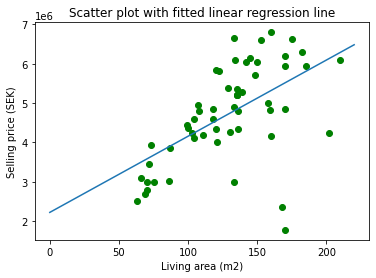

In [9]:
#Plotting the regresion line

xfit = np.linspace(0, df['Living_area'].max()+10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.title("Scatter plot with fitted linear regression line")
plt.xlabel("Living area (m2)")
plt.ylabel("Selling price (SEK)")

plt.scatter(x, y, c ='g')
plt.plot(xfit, yfit)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             56 non-null     int64  
 1   Living_area    56 non-null     int64  
 2   Rooms          54 non-null     float64
 3   Land_size      55 non-null     float64
 4   Biarea         32 non-null     float64
 5   Age            56 non-null     int64  
 6   Selling_price  56 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 3.2 KB


In [11]:
df_test = df[['Living_area','Selling_price']]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Living_area    56 non-null     int64
 1   Selling_price  56 non-null     int64
dtypes: int64(2)
memory usage: 1.0 KB


In [12]:
# Position of the Outliers
outliers = np.where((df["Living_area"]>160) & (df["Selling_price"]<3000000))
print(outliers)

(array([40, 45]),)


In [13]:
df_test.drop(outliers[0], inplace = True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 55
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Living_area    54 non-null     int64
 1   Selling_price  54 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


After ploting the linear regression line with all the data points we noticed that there were few ouliers which are some larger house but have a lot lower in price to compare with smaller house. Although, we know that the price of a house is not only depends on the living area but also a lot of others factors, in this analyis we want to predict the selling price based on its size which might affected on the accuracy of the model. Hence, we considered that the house which have living area larger than 160 m2 but the price is less than 3000000 SEK are outliers and removed them.

## Values of the slope and intercept of the regression line

In [14]:
#Slope of the line:
print("Model slope:", model.coef_[0])

Model slope: 19370.13854733158


In [15]:
#Intercept of the line:
print("Intercept of the line:", model.intercept_)

Intercept of the line: 2220603.243355869


## Predicting the selling prices of houses which have living area 100 m2, 150 m2 and 200 m2. 

In [16]:
#Predicting living area 100m2 value:
print('Predicting the selling price for 100 m2 living area:',model.predict([[100]])[0])

Predicting the selling price for 100 m2 living area: 4157617.0980890268


In [17]:
#Predicting living area 150m2 value:
print('Predicting the selling price for 150 m2 living area:',model.predict([[150]])[0])

Predicting the selling price for 150 m2 living area: 5126124.025455605


In [18]:
#Predicting living area 200m2 value:
print('Predicting the selling price for 200 m2 living area:',model.predict([[200]])[0])

Predicting the selling price for 200 m2 living area: 6094630.952822184


## Residual plot

### Residual plot before removing outliers

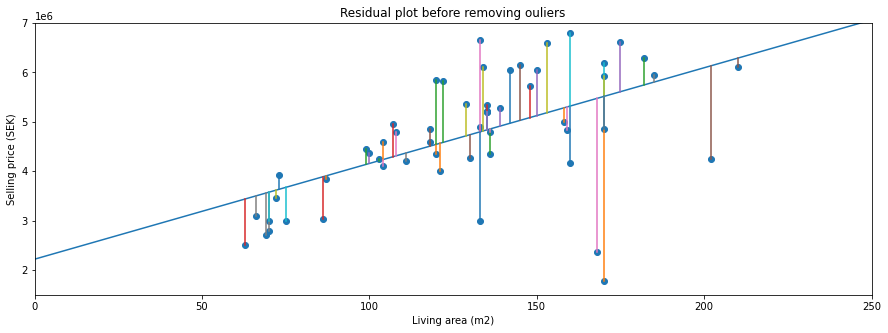

In [19]:
model = LinearRegression()

plt.figure(figsize=(15,5))

xValues = df['Living_area']
yValues = df['Selling_price']
model.fit(xValues[:, np.newaxis], yValues)
xfit = np.array([0, 250])
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(xValues, yValues)
plt.plot(xfit, yfit)
yPredicted = model.predict(xValues[:, np.newaxis])
plt.title("Residual plot before removing ouliers")
plt.xlabel("Living area (m2)")
plt.ylabel("Selling price (SEK)")
plt.xlim(0, 250)
plt.ylim(1500000, 7000000)


# Python code that draws residuals
for j in range(len(xValues)):
    lineXdata = (xValues[j], xValues[j])
    lineYdata = (yValues[j], yPredicted[j])
    plt.plot(lineXdata, lineYdata)
        
plt.show()

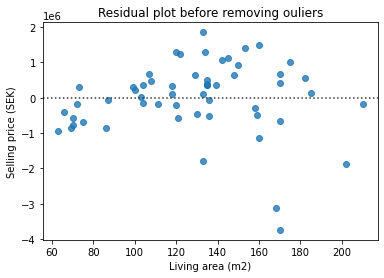

In [20]:
sns.residplot(x='Living_area', y='Selling_price', data = df)

plt.title("Residual plot before removing ouliers")
plt.xlabel("Living area (m2)")
plt.ylabel("Selling price (SEK)")
plt.show()

### Residual plot after removing outliers

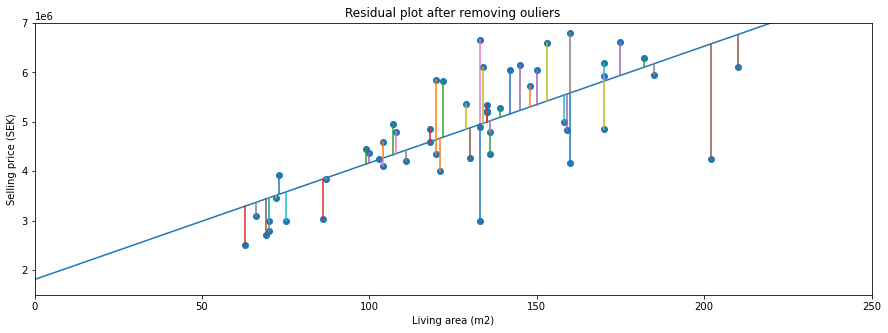

In [21]:
model = LinearRegression()
plt.figure(figsize=(15,5))


xValues = np.array(df_test["Living_area"])
yValues = np.array(df_test["Selling_price"])
model.fit(xValues[:, np.newaxis], yValues)
xfit = np.array([0, 250])
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(xValues, yValues)
plt.plot(xfit, yfit)
yPredicted = model.predict(xValues[:, np.newaxis])
plt.title("Residual plot after removing ouliers")
plt.xlabel("Living area (m2)")
plt.ylabel("Selling price (SEK)")
plt.xlim(0, 250)
plt.ylim(1500000, 7000000)

# Python code that draws residuals
for j in range(len(xValues)):
    lineXdata = (xValues[j], xValues[j])
    lineYdata = (yValues[j], yPredicted[j])
    plt.plot(lineXdata, lineYdata)        
plt.show()

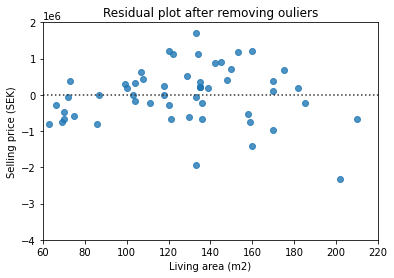

In [22]:
sns.residplot(x='Living_area', y='Selling_price', data = df_test)
plt.title("Residual plot after removing ouliers")
plt.xlabel("Living area (m2)")
plt.ylabel("Selling price (SEK)")
plt.xlim(60, 220)
plt.ylim(-4000000, 2000000)
plt.show()

## Discuss the results, and how the model could be improved.

The value for the intercept term in this model is <b>2220603</b>. This would mean the average selling price of a house is 2220603 SEK when its living area equals zero. This does not make sense to interpret since it is not possible for a house's selling price to equal zero. However, we still need to keep the intercept term in the model in order to use the model to make predictions. 

In the residual plots, we more easily saw the problem of the data set. A good model should have the residual values be equally and randomly spaced around the horizontal axis. In the residual graph above, we can see data points above and below the residual line = 0. It also presented that the data points form a curved or U-shaped pattern. Since there is a discernible pattern in the residual graph, we can conclude that a linear model is unsuitable for data. Adding more interaction terms or two or more independent variables impacts the target variable for a more accurate result.

There are so many factors that influence home prices that it is fascinating to extend this correlation analysis to other variables such as location, neighborhood comps,  living area, number of rooms, house's condition, and distance from the airport. We can then see which variables have the highest correlation coefficient with home prices and which factors significantly impact home prices.

# Classification

## Using confusion matrix to evaluate the use of Logistic regression to classify the iris data set. 

In [23]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns #seaborn is a package for nice-looking graphics
from sklearn import metrics

In [24]:
#Load the data set
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
#iris

In [26]:
#Split the data into training set(70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 1)

In [27]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Make predictions on entire test data
predictions = LR.predict(X_test)

In [29]:
# Use the score method to get the accuracy of model
score = LR.score(X_test, y_test)
print(score)

0.9777777777777777


In [30]:
cm = metrics.confusion_matrix(y_test, predictions)

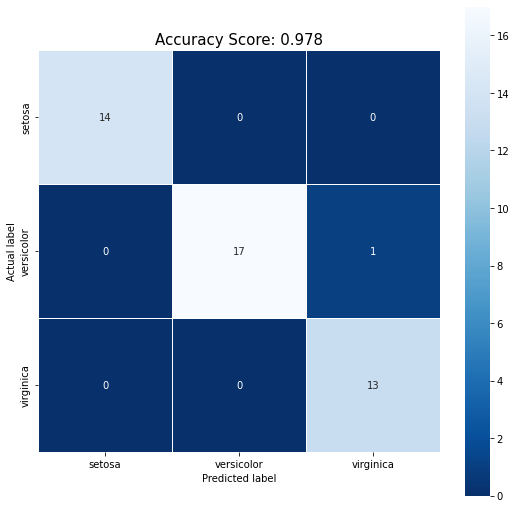

In [31]:
#Compute confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r',
           xticklabels = iris.target_names, yticklabels = iris.target_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: %.3f' % score
plt.title(all_sample_title, size = 15);
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

## Using k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights

In [32]:
#Create KNN Classifier
knn1 = KNeighborsClassifier(n_neighbors = 1, weights ='uniform') #k=1,3,21

#Train the model using the training sets
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
#Predict the response for test dataset
y_pred = knn1.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [36]:
# Make a function to draw the graph with 2 different line of 2 different base weights
def KNN_plot(n_neighbors, weight_uniform, weight_distance, title):
    plt.figure(figsize=(15,6))
    line1, = plt.plot(n_neighbors, weight_uniform, 'b', label = "Uniform-based weights",
             marker='o')
    line2, = plt.plot(n_neighbors, weight_distance, 'r', label = "Distance-based weights",
             marker='o')
    plt.title(title)
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('Number of neighbors')
    plt.show()

In [37]:
n_neighbors = [n_neighbor for n_neighbor in range(1,100) if n_neighbor%3==0]

weight_uniform = []
weight_distance = []

for n_neighbor in n_neighbors:
    KNNU = KNeighborsClassifier(n_neighbors = n_neighbor, weights = 'uniform')
    KNNU.fit(X_train, y_train)
    YpredTrainU = KNNU.predict(X_test)
    UAccuracy = accuracy_score(y_test, YpredTrainU)
    
    KNND = KNeighborsClassifier(n_neighbors=n_neighbor, weights = 'distance')
    KNND.fit(X_train, y_train)
    YpredTrainD = KNND.predict(X_test)
    DAccuracy = accuracy_score(y_test, YpredTrainD)
    
    weight_uniform.append(UAccuracy)
    weight_distance.append(DAccuracy)

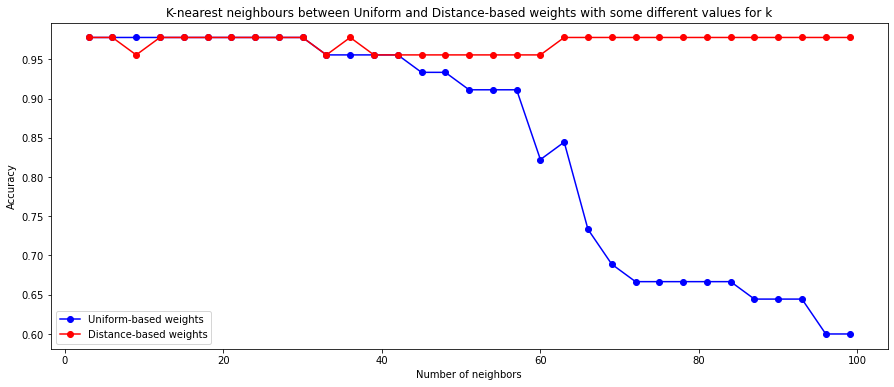

In [38]:
KNN_plot(n_neighbors,weight_uniform,weight_distance,
               "K-nearest neighbours between Uniform and Distance-based weights with some different values for k")

Over the number of neighbors from 1 to around 30, the two different weights of KNeighborsClassifier have the same trend in the accuracy. However, when k greater than 40, those 2 lines had different directions of change.

The default weights of KNeighbors Classifier are set to <i><b>uniform</b></i> which is the blue line from the graph above; as we can see, the accuracy of the K-nearest model with uniform-based weights decreased marginally when the numbers of neighbours around from approximate 30 to 58. Then the accuracy steeply fell until it reached the accuracy at 60% when the number of neighbours equal to 100. The reason is that the effective voting method above assumes that each of the neighbours' closest points has the same role and that each of these points has the same voting value.

On the other hand, in <i><b>distance-based</b></i> weights, the accuracy remains the same or only fall by around 2% in some case the number of neighbours but it was always greater than 95%. In this case, closer neighbours of a query point will have more influence than further away neighbours.

## Compare the classification models for the iris data set that are generated by k-nearest neighbours and by logistic regression.

In [39]:
KNNU100 = KNeighborsClassifier(n_neighbors = 100, weights = 'uniform')
KNNU100.fit(X_train, y_train)
YpredTrainU100 = KNNU100.predict(X_test)
UAccuracy100 = accuracy_score(y_test, YpredTrainU100)
knu100 = metrics.confusion_matrix(y_test, YpredTrainU100)

In [40]:
print("Testing accuracy of KNN with k = 1, weights = 'uniform':",metrics.accuracy_score(y_test, y_pred))
print("Testing accuracy of KNN with k = 100, weights = 'uniform':",accuracy_score(y_test, YpredTrainU100))
print("Testing accuracy of Logistic Regression:",LR.score(X_test, y_test))

Testing accuracy of KNN with k = 1, weights = 'uniform': 0.9777777777777777
Testing accuracy of KNN with k = 100, weights = 'uniform': 0.6
Testing accuracy of Logistic Regression: 0.9777777777777777


As long as we know the best number of neighbours suitable for the different weights function values to support bringing out the best accuracy score for the KNeighbors Classifier model. When using the hyperparameter, which returns the highest accuracy for KNN, we got the same value with Logistic Regression. We might consider other factors besides the accuracy score if we want to compare them both.

##  Calculate confusion matrices for these models and discuss the performance of the various models. 

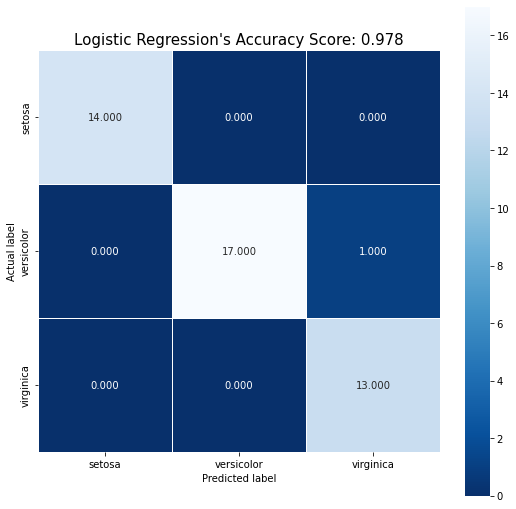

In [41]:
#Compute confusion matrix for LR
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',
           xticklabels = iris.target_names, yticklabels = iris.target_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = ('Logistic Regression\'s Accuracy Score: %.3f' % score);
plt.title(all_sample_title, size = 15);
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

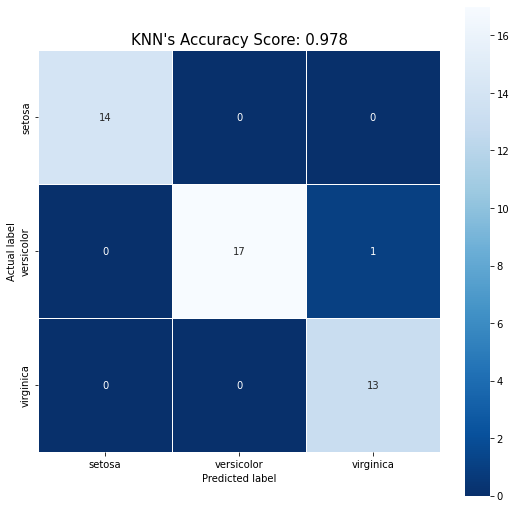

In [42]:
#Compute confusion matrix for KNN with k = 10, weights = 'uniform'
KNNU10 = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform')
KNNU10.fit(X_train, y_train)
YpredTrainU10 = KNNU10.predict(X_test)
UAccuracy10 = accuracy_score(y_test, YpredTrainU10)
knu10 = metrics.confusion_matrix(y_test, YpredTrainU10)
plt.figure(figsize=(9,9))
sns.heatmap(knu10, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r',
           xticklabels = iris.target_names, yticklabels = iris.target_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = ('KNN\'s Accuracy Score: %.3f' % UAccuracy10);
plt.title(all_sample_title, size = 15);
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

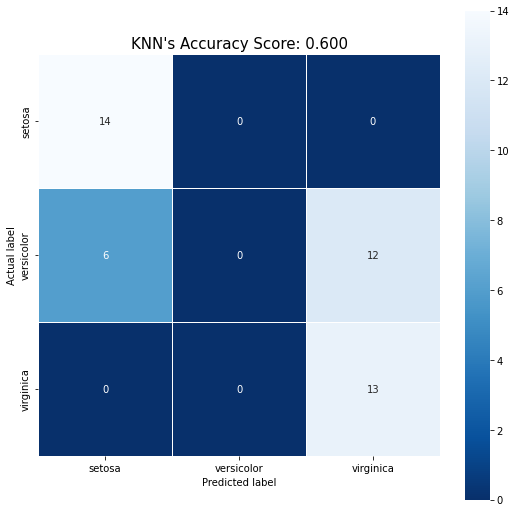

In [43]:
#Compute confusion matrix for KNN with k = 100, weights = 'uniform'
KNNU100 = KNeighborsClassifier(n_neighbors = 100, weights = 'uniform')
KNNU100.fit(X_train, y_train)
YpredTrainU100 = KNNU100.predict(X_test)
UAccuracy100 = accuracy_score(y_test, YpredTrainU100)
knu100 = metrics.confusion_matrix(y_test, YpredTrainU100)
plt.figure(figsize=(9,9))
sns.heatmap(knu100, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r',
           xticklabels = iris.target_names, yticklabels = iris.target_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = ('KNN\'s Accuracy Score: %.3f' % UAccuracy100);
plt.title(all_sample_title, size = 15);
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

In the above figures, with Logistic Regression and KNN with k = 10, weights = 'uniform', the first cell represents the number of Setosa correctly classified by our model, which is 14/14 as same as Virginica. In the second cell of the first two confusion matrices, 17/18 Versicolor were classified correctly, and one is incorrect.
On the other hand, in the confusion matrix for KNN with k = 100, weights = 'uniform', none of the Versicolor was correctly classified.

# Explain why it is important to use a separate test (and sometimes validation) set. 

It is important to separate our data into training, validation, and testing sets to ensure the fairness of the evaluation process. The training and testing set should be completely independent of each other. 

The training set is the set used to train the model, the validation set is the set used to select the appropriate model among the candidates trained on the training set, and the testing set is the set to test and evaluate the obtained results of the prediction model. The validation set can be included in the training set itself, but the testing set should be independent and completely separate from the above two sets because it shows how well the model will expect to predict on "real" data.

The data used to test the model must not be seen by the model during training because the goal of machine learning is to build a generalized model that can predict data that has never been seen before. Showing the model this data while learning reveals the previous problem when taking the test. Exposing this topic leads to the result that the model may study hard on this test, leading to cabinet learning, rote learning and "overfitting". It is excellent when testing, but it does not give an accurate result when it comes to actual work. Therefore, dividing the data into the training and test sets is required and must be done before training. 